In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("combined.parquet")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640464 entries, 0 to 1640463
Data columns (total 89 columns):
 #   Column                                       Non-Null Count    Dtype         
---  ------                                       --------------    -----         
 0   Accident_Index                               1640464 non-null  object        
 1   Longitude                                    1640353 non-null  float64       
 2   Latitude                                     1640353 non-null  float64       
 3   Number_of_Vehicles                           1640464 non-null  int64         
 4   Number_of_Casualties                         1640464 non-null  int64         
 5   Date                                         1640464 non-null  datetime64[ns]
 6   Local_Authority_(District)                   1640464 non-null  int64         
 7   1st_Road_Class                               1640464 non-null  int64         
 8   1st_Road_Number                              1640464

In [4]:
df["Accident_Severity"].value_counts(normalize=True)

3    0.851628
2    0.135339
1    0.013034
Name: Accident_Severity, dtype: float64

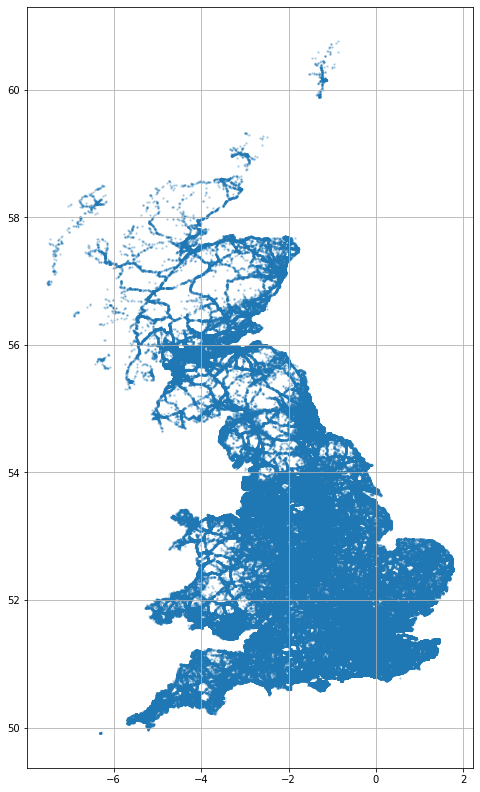

In [5]:
plt.figure(figsize=(8, 14))
plt.scatter(df["Longitude"], df["Latitude"], s=2, alpha=0.25)
plt.grid()

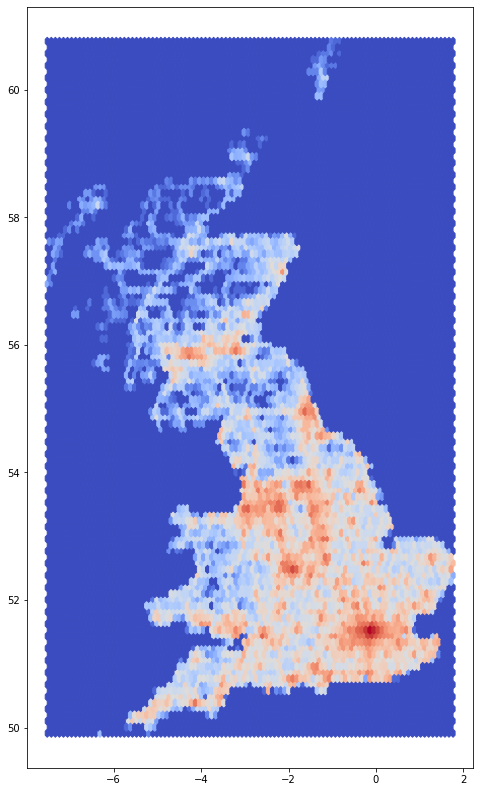

In [6]:
plt.figure(figsize=(8, 14))
plt.hexbin(df["Longitude"], df["Latitude"], bins='log', cmap='coolwarm')

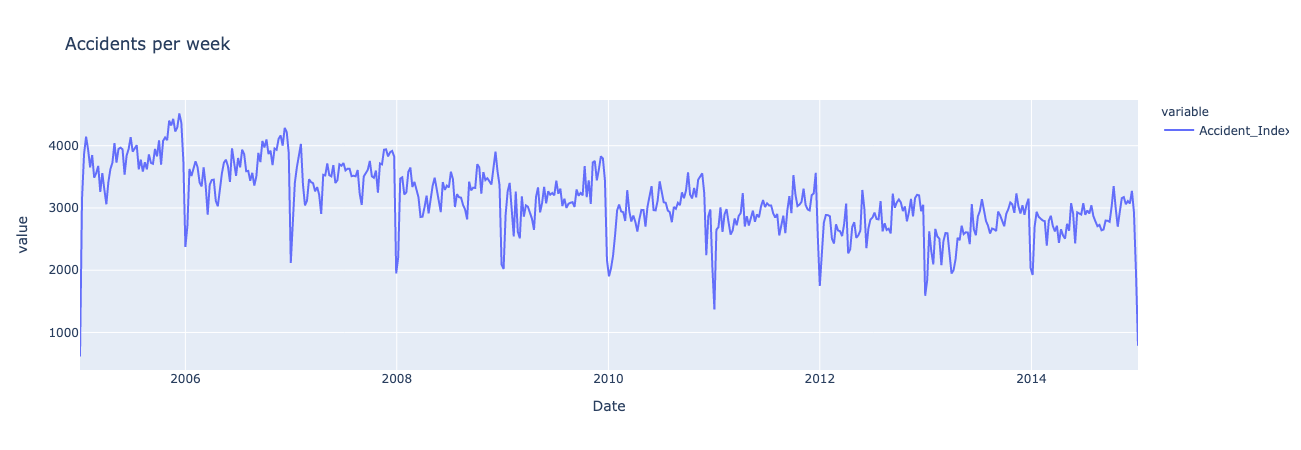

In [7]:
df.set_index("Date").resample("W")["Accident_Index"].count().plot(backend="plotly", title="Accidents per week")

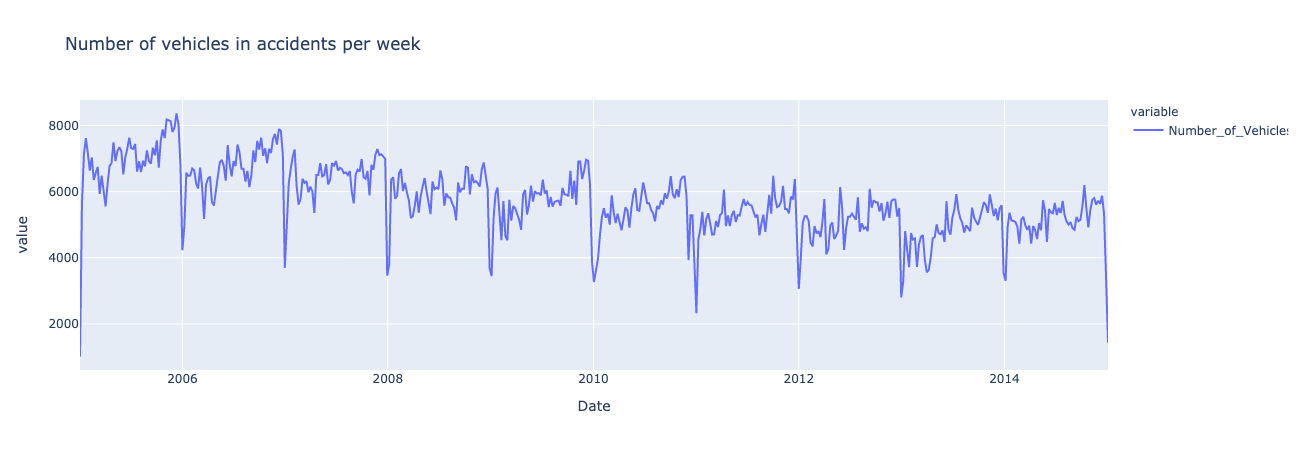

In [8]:
(df.set_index("Date")
 .resample("W")["Number_of_Vehicles"]
 .sum().plot(backend="plotly", title="Number of vehicles in accidents per week"))

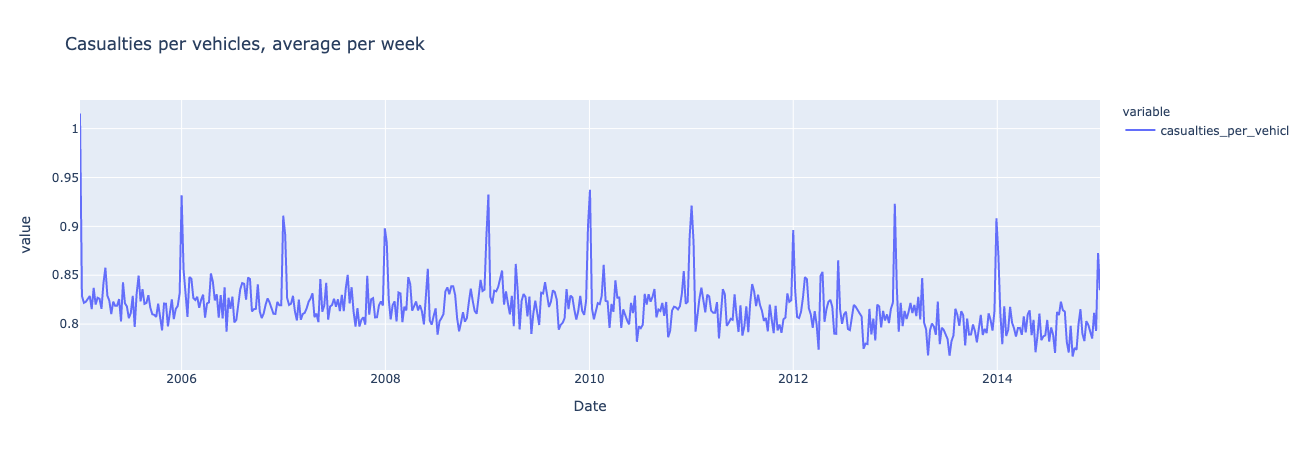

In [9]:
(df.assign(casualties_per_vehicle=df["Number_of_Casualties"]/df["Number_of_Vehicles"])
 .set_index("Date").resample("W")["casualties_per_vehicle"]
 .mean().plot(backend="plotly", title="Casualties per vehicles, average per week"))

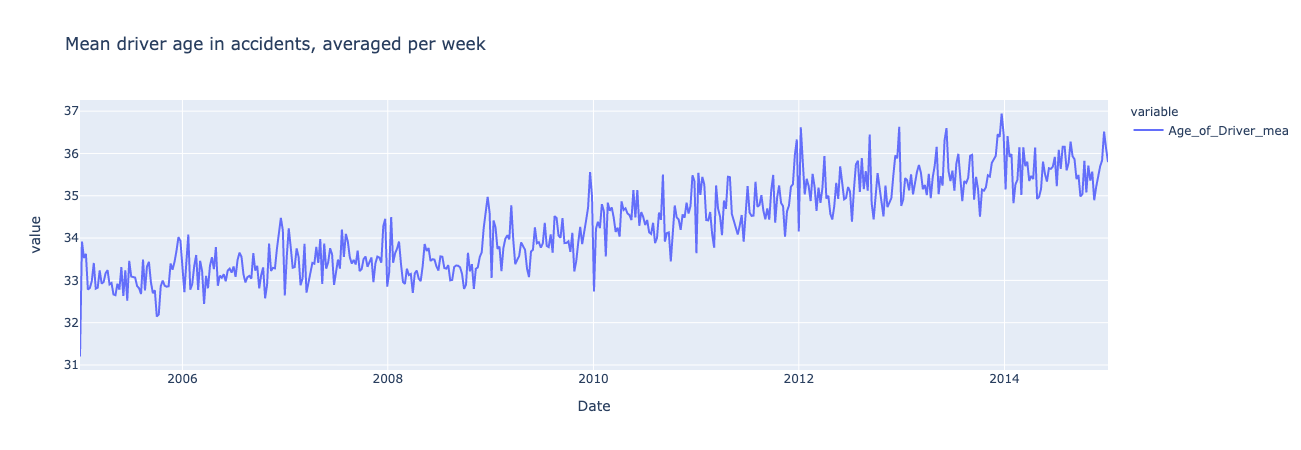

In [10]:
(df.set_index("Date")
 .resample("W")["Age_of_Driver_mean"]
 .mean().plot(backend="plotly", title="Mean driver age in accidents, averaged per week"))

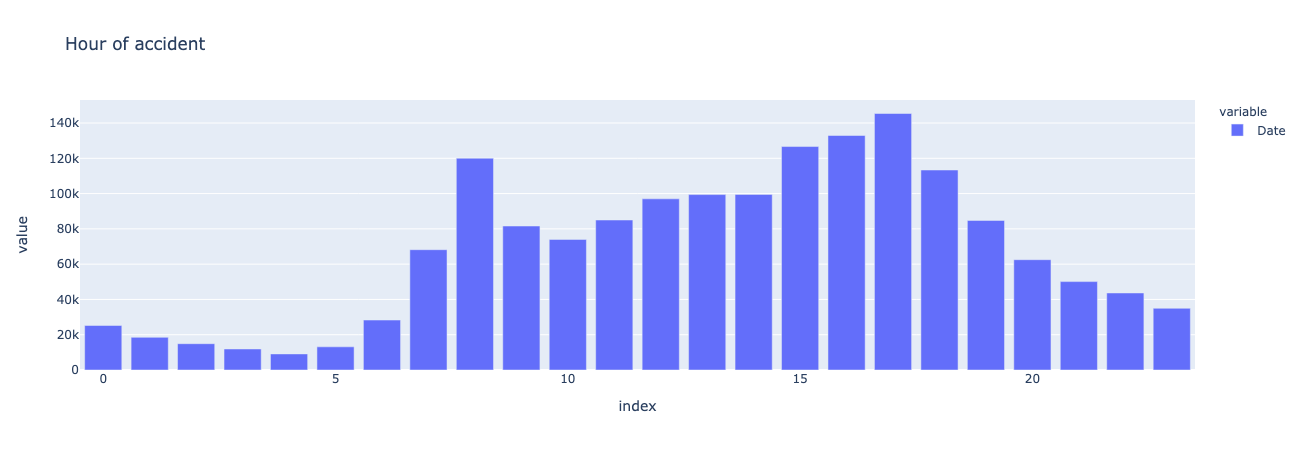

In [11]:
df["Date"].dt.hour.value_counts().sort_index().plot.bar(backend="plotly", title="Hour of accident")

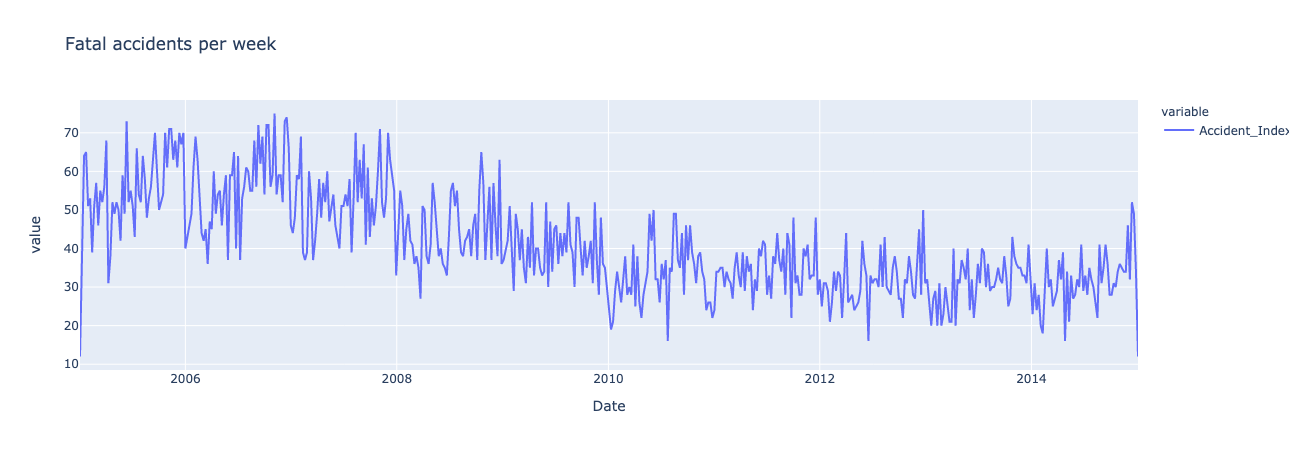

In [12]:
(df[df["Accident_Severity"] == 1]
 .set_index("Date").resample("W")["Accident_Index"].count()
 .plot(backend="plotly", title="Fatal accidents per week"))

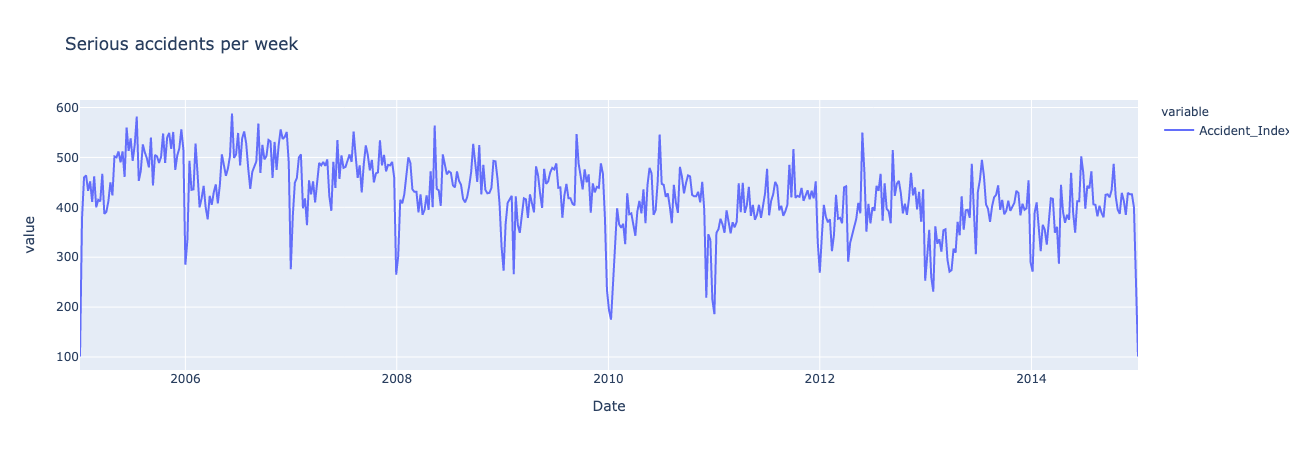

In [13]:
(df[df["Accident_Severity"] == 2]
 .set_index("Date").resample("W")["Accident_Index"].count()
 .plot(backend="plotly", title="Serious accidents per week"))

In [14]:
df.columns

Index(['Accident_Index', 'Longitude', 'Latitude', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Local_Authority_(District)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Age_of_Driver_min', 'Age_of_Driver_mean', 'Age_of_Driver_max',
       'Age_of_Vehicle_min', 'Age_of_Vehicle_mean', 'Age_of_Vehicle_max',
       'Age_of_Casualty_min_min', 'Age_of_Casualty_mean_mean',
       'Age_of_Casualty_max_max', 'Pedestrian_isCrossing_sum_sum',
       'Pedestrian_Road_Maintenance_Worker_sum_sum', 'Male_Casaulties_sum_sum',
       'Passenger_sum_sum', 'Pedestrian_su

In [15]:
corr = df[["Longitude", "Latitude", "Number_of_Vehicles", "Number_of_Casualties", "Age_of_Driver_mean",
           "Age_of_Vehicle_mean", "Age_of_Casualty_mean_mean", 'day_of_week_x', 'day_of_week_y',
           'hour_x', 'hour_y', 'VehTypeTwoWheeler_sum', 'DriverIMD1_sum', 'DriverIMD10_sum',
           "Overturned_sum", "Skidded_sum", "Jackknifed_sum", 'HitObjectVertical_sum', 'HitObjectDown_sum',
           'CasaultyFatal_sum_sum', 'CasaultySerious_sum_sum', 'CasaultySlight_sum_sum', "Accident_Severity"]].corr()

<AxesSubplot:>

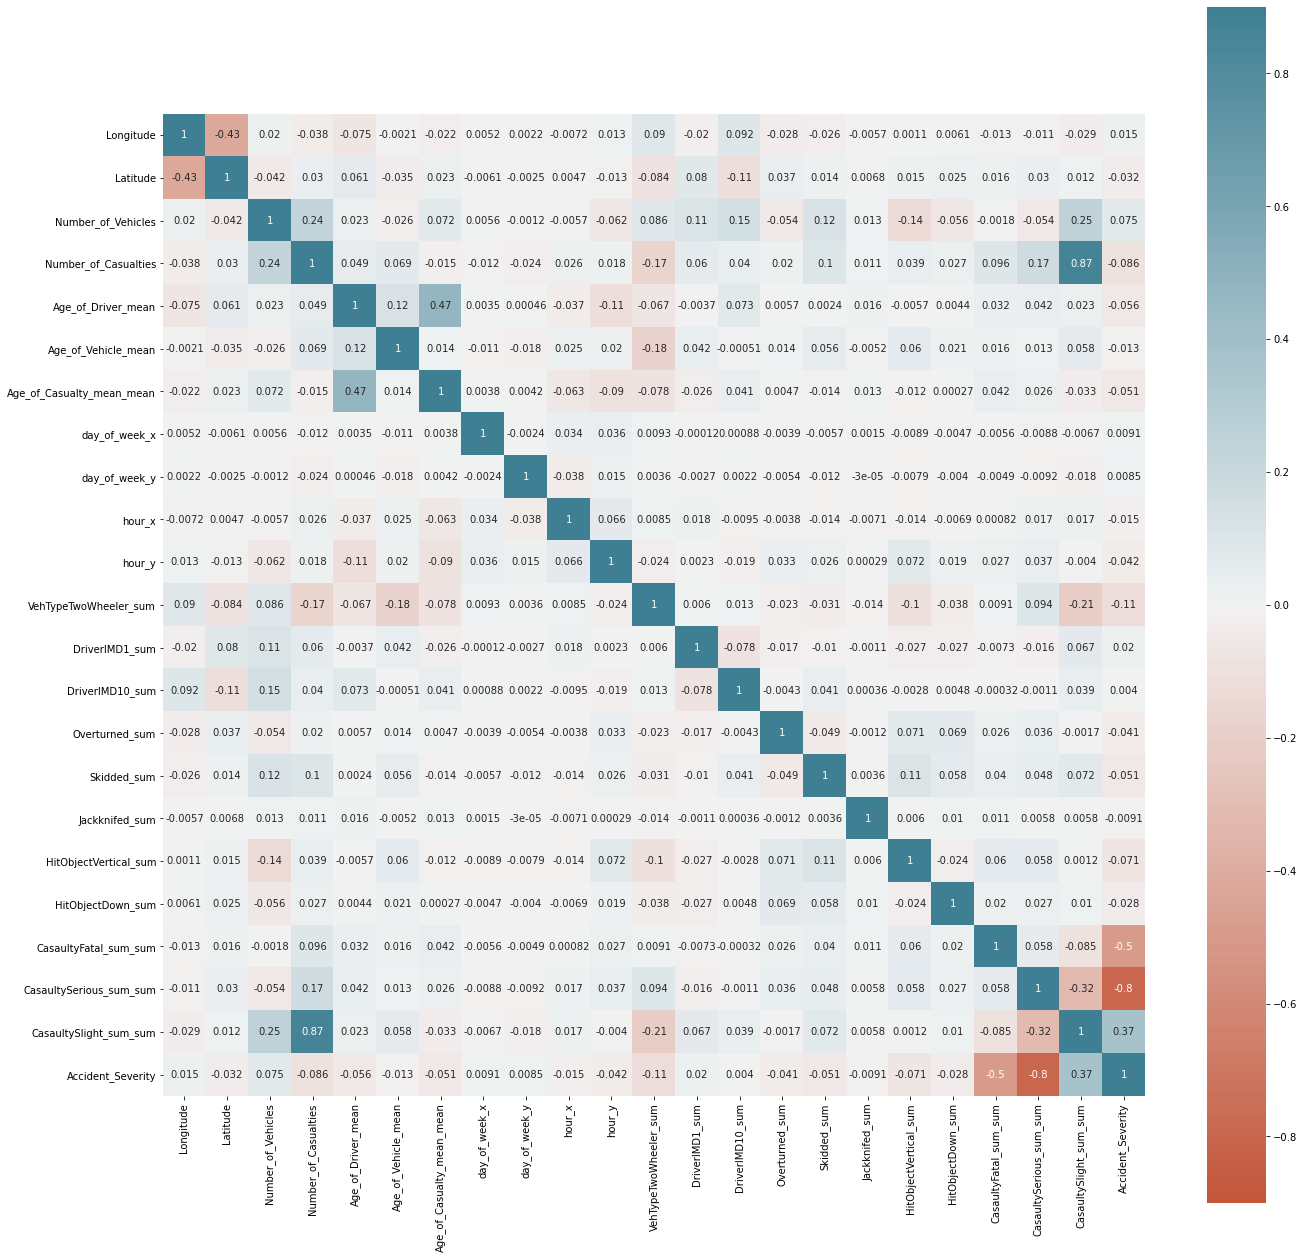

In [16]:
plt.figure(figsize=(22, 22))
sns.heatmap(corr, annot=True, fmt='.2g', square=True,
            cmap=sns.diverging_palette(20, 220, n=256, as_cmap=True),
            vmin=-0.9, vmax=0.9)